# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import pandas as pd
import numpy as np
# Create two new dataframes
north_df=pd.read_csv('NorthCallCenter.csv')
south_df=pd.read_csv('SouthCallCenter.csv')

In [4]:
north_df.shape

north_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [5]:
south_df.shape

south_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [6]:
#Code Used:
n_reps=north_df['Rep ID'].nunique()



print('unique representatives of north branch',n_reps)

unique representatives of north branch 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [39]:
#Code Used:
s_reps= south_df['Rep ID'].nunique()

print('unique representatives of south branch',s_reps)

unique representatives of south branch 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean')

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean').round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [40]:
# # Code Used:
# n_tb_gpby=north_df.groupby('Time Block')

# # df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

# no_of_calls_north =n_tb_gpby.aggregate({'Calls':'sum'})

# print('no of calls for north branch',no_of_calls_north)

# s_tb_gpby=south_df.groupby('Time Block')

# no_of_calls_south =s_tb_gpby.aggregate({'Calls':'sum'})

# print('no of calls for south branch',no_of_calls_south)

# total_no_of_calls=no_of_calls_north+no_of_calls_south

# print('no.of calls for south and north and branch',total_no_of_calls)

no of calls for north branch             Calls
Time Block       
10:00 AM       43
11:00 AM       25
12:00 PM       45
1:00 PM        17
2:00 PM        35
3:00 PM        30
4:00 PM        28
5:00 PM        17
9:00 AM         5
no of calls for south branch             Calls
Time Block       
10:00 AM       56
11:00 AM       31
12:00 PM       75
1:00 PM        23
2:00 PM        30
3:00 PM        43
4:00 PM        25
5:00 PM        26
9:00 AM         5
no.of calls for south and north and branch             Calls
Time Block       
10:00 AM       99
11:00 AM       56
12:00 PM      120
1:00 PM        40
2:00 PM        65
3:00 PM        73
4:00 PM        53
5:00 PM        43
9:00 AM        10


In [117]:
e = pd.concat([north_df['Time Block'],south_df['Time Block']])
e.value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  =  99
> - 11:00AM  =  56
> - 12:00PM  =  120
> - 1:00PM   =  40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   =  53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

(245, 15)


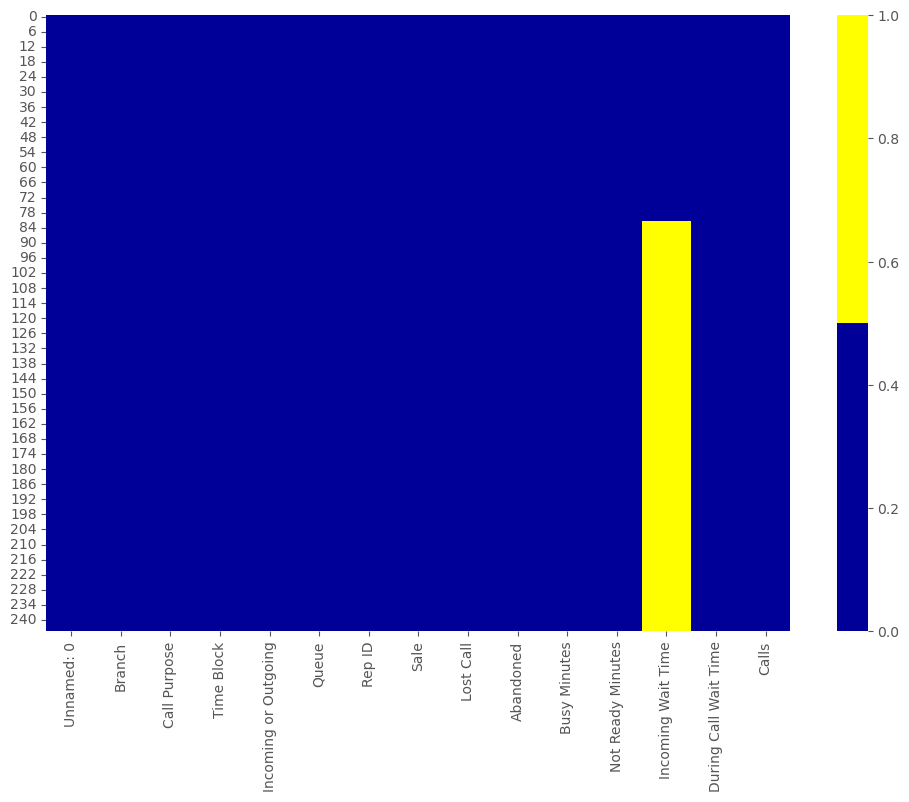

In [11]:
# Code Used
# Add Additional Cells as needed.

cols = north_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)


In [33]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    print(north_df.shape)

Unnamed: 0 - 0%
(245, 15)
Branch - 0%
(245, 15)
Call Purpose - 0%
(245, 15)
Time Block - 0%
(245, 15)
Incoming or Outgoing - 0%
(245, 15)
Queue - 0%
(245, 15)
Rep ID - 0%
(245, 15)
Sale - 0%
(245, 15)
Lost Call - 0%
(245, 15)
Abandoned - 0%
(245, 15)
Busy Minutes - 0%
(245, 15)
Not Ready Minutes - 0%
(245, 15)
Incoming Wait Time - 67%
(245, 15)
During Call Wait Time - 0%
(245, 15)
Calls - 0%
(245, 15)


<Axes: >

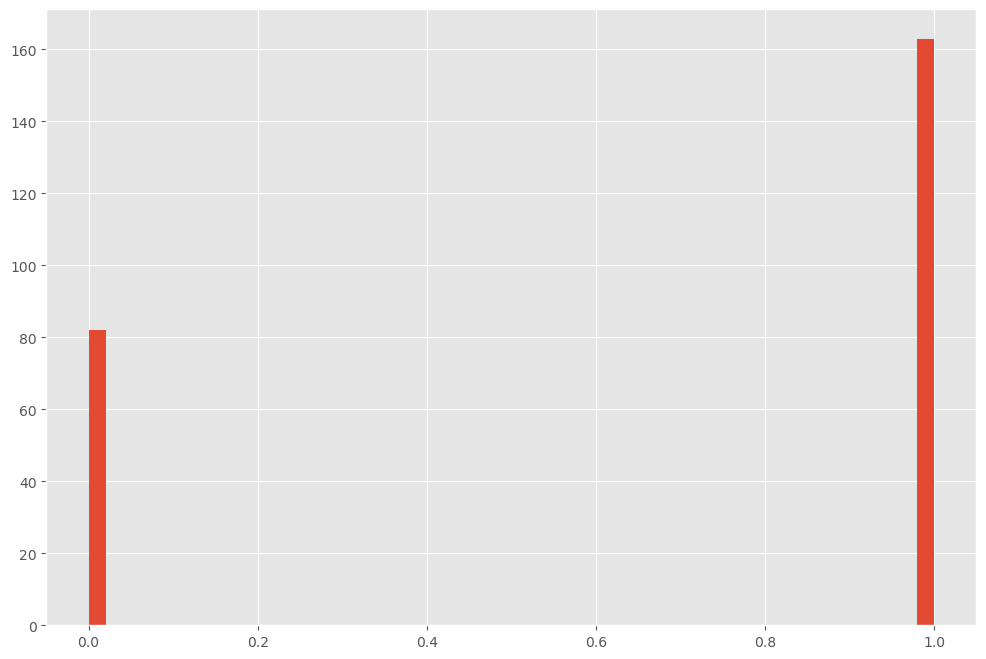

In [37]:
missing_by_row = north_df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)



In [29]:
north_df.isna().sum().sum()

163

In [30]:
north_df['Incoming Wait Time'].isna().sum()

163

(314, 15)


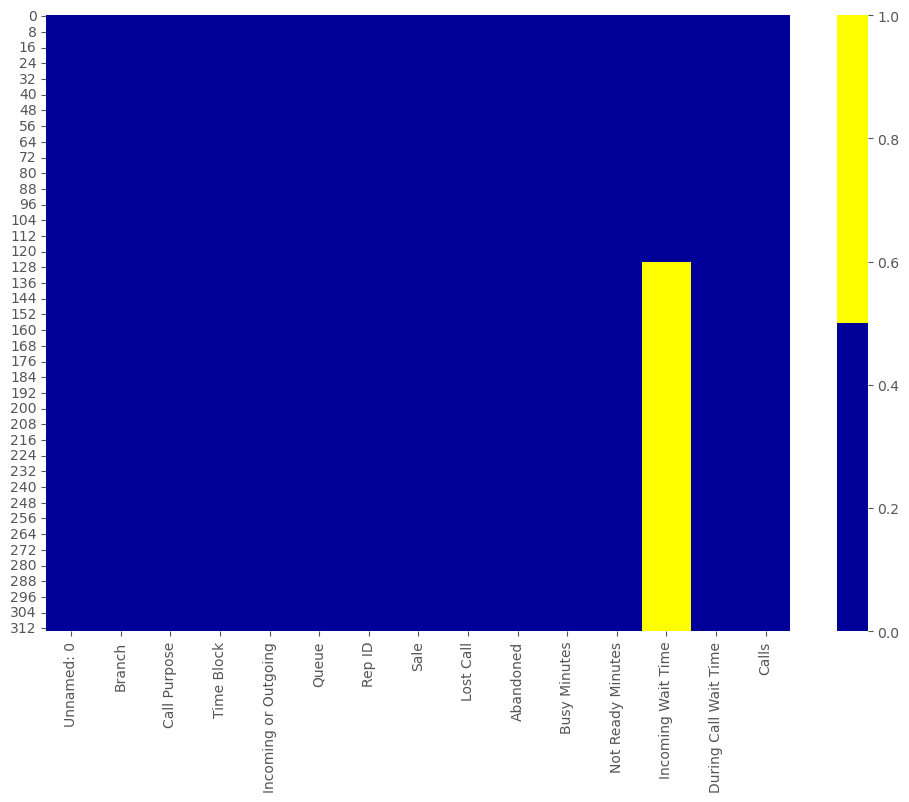

In [20]:
cols = south_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)


In [32]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    print(south_df.shape)

Unnamed: 0 - 0%
(314, 15)
Branch - 0%
(314, 15)
Call Purpose - 0%
(314, 15)
Time Block - 0%
(314, 15)
Incoming or Outgoing - 0%
(314, 15)
Queue - 0%
(314, 15)
Rep ID - 0%
(314, 15)
Sale - 0%
(314, 15)
Lost Call - 0%
(314, 15)
Abandoned - 0%
(314, 15)
Busy Minutes - 0%
(314, 15)
Not Ready Minutes - 0%
(314, 15)
Incoming Wait Time - 60%
(314, 15)
During Call Wait Time - 0%
(314, 15)
Calls - 0%
(314, 15)


In [24]:
south_df['Sale'].isnull().value_counts()

False    314
Name: Sale, dtype: int64

In [25]:
south_df['Incoming Wait Time'].isnull().sum()

188

<Axes: >

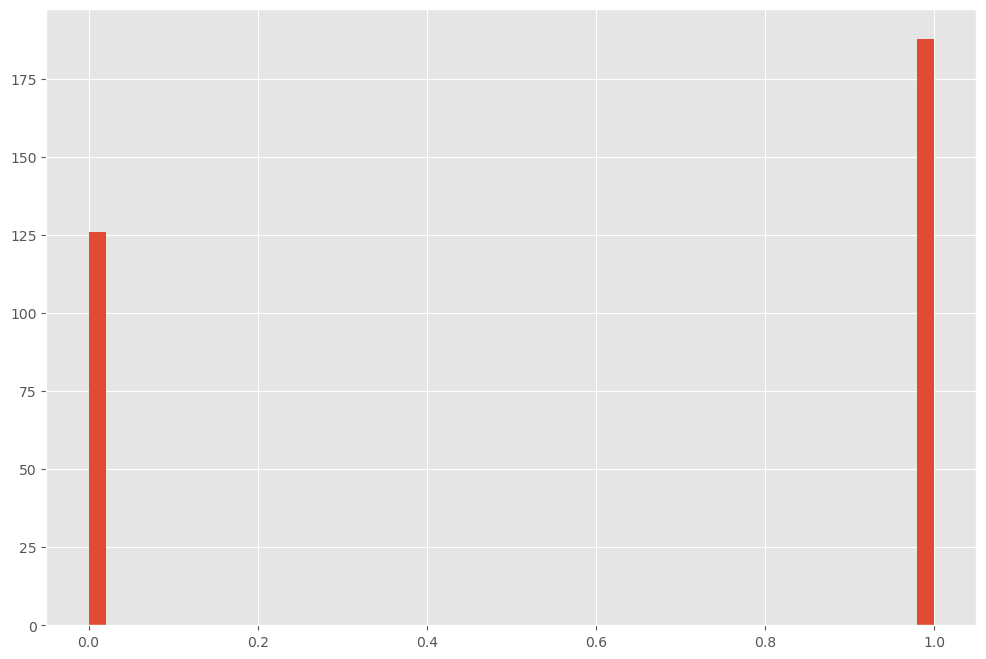

In [38]:
missing_by_row = south_df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)



#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Replaced Yes to true and No to False, So that we can differentiate between 2 Yes Values

In [108]:
#Code Used
# Add Additional Cells as needed.


north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [126]:
north_df=north_df.replace({'Sale':{'NO':False,'YES':True}})

north_df['Sale'].value_counts()

False    234
True      10
YES        1
Name: Sale, dtype: int64

In [128]:
south_df=south_df.replace({'Sale':{'NO':False,'YES':True}})

south_df['Sale'].value_counts()

False    308
True       6
Name: Sale, dtype: int64

In [140]:
north_dfre = north_df['Incoming Wait Time'].fillna(north_df['Incoming Wait Time'].mean(),inplace = True)

# north_dfre.value_counts()

north_df['Incoming Wait Time'].value_counts()

3.04878    163
4.00000     20
1.00000     17
5.00000     17
2.00000     16
3.00000     12
Name: Incoming Wait Time, dtype: int64

In [141]:
south_dfre=south_df['Incoming Wait Time'].fillna(south_df['Incoming Wait Time'].mean(),inplace=True)

south_df['Incoming Wait Time'].value_counts()

# south_dfre.value_counts()

3.0    217
4.0     30
2.0     28
1.0     20
5.0     19
Name: Incoming Wait Time, dtype: int64

(245, 15)


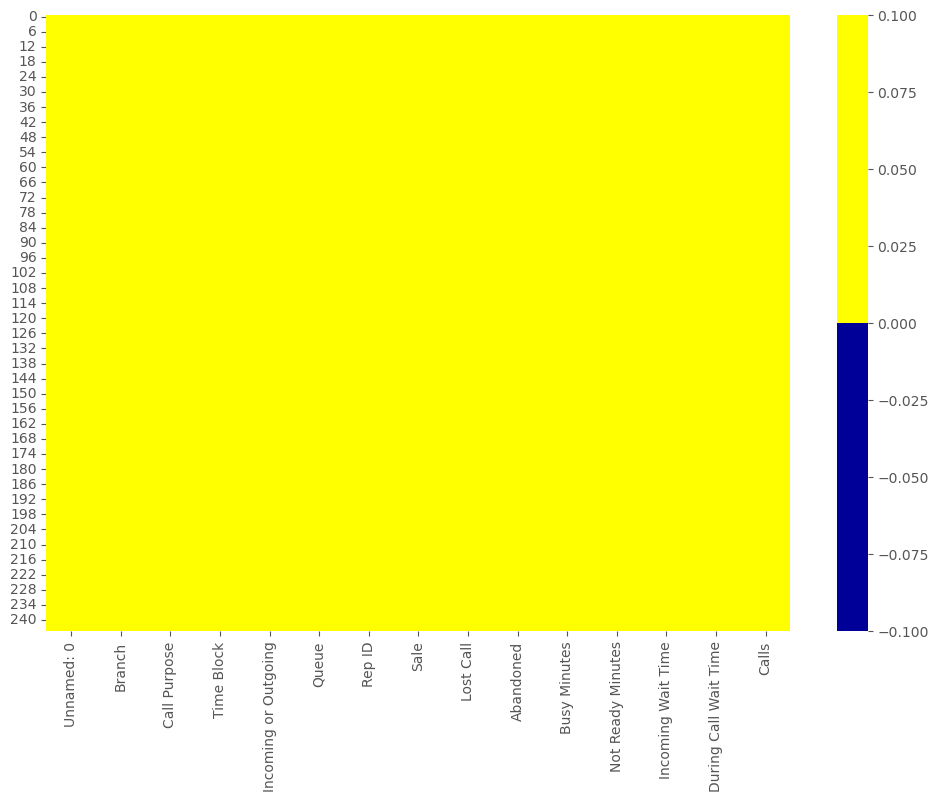

In [83]:
cols = north_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)

(314, 15)


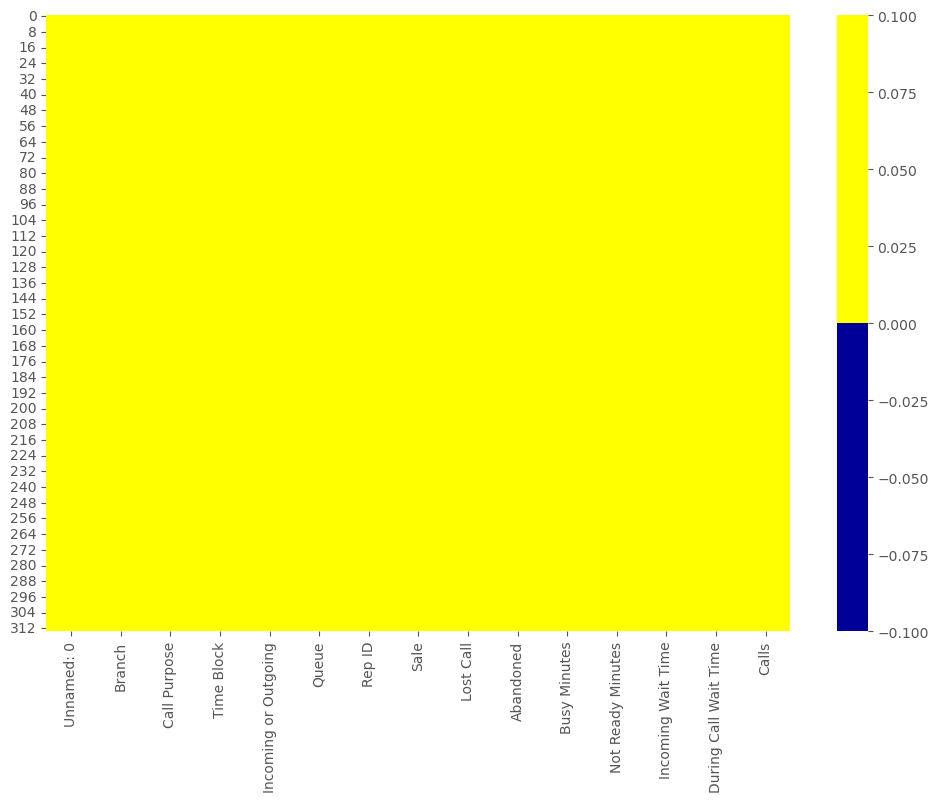

In [101]:
cols = south_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicated rows

In [106]:
#Code Used
# Add Additional Cells as needed.

north_duplicate=north_df[north_df.duplicated()]
 
north_duplicate


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [107]:
south_duplicate=south_df[south_df.duplicated()]

south_duplicate

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

In [ ]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [137]:
# Create dataframe for the entire company named df

df=pd.concat([north_df,south_df])

df.columns
df['Call Purpose'].value_counts()

Product Support    310
Sales Support      198
Complaint           51
Name: Call Purpose, dtype: int64

In [20]:
df = df.drop(["Unnamed: 0"],axis = 1)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [179]:
# Code Used
# Add Additional Cells as needed.
df_grpid=df.groupby(['Branch','Rep ID']).agg('sum')

df_grpid

C:\Users\tejas\AppData\Local\Temp\ipykernel_33964\1548256650.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grpid=df.groupby(['Branch','Rep ID']).agg('sum')


Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
North  Amanda        2666          0          1           229   
       Andy          2494          0          3           228   
       Brent         4840          0          1           362   
       Cam           2746          1          0           233   
       Duke          2999          2          0           292   
       Joe           3178          0          0           256   
       Lilly         3375          0          2           307   
       Todd          4252          1          0           296   
       Xander        3340          1          0           244   
South  Alice         3637          0          0           199   
       Eric          5039          0          0           361   
       George        4620          0          0           298   
       Helga         5236          0          2           292   
       Josh          3960          3          0           260   
       Karl          4532          1          0           287   
       Kate          4615          0          0           291   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Sharon        4226          1          1           257   
       Susan         4006          2          0           267   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
North  Amanda                 43           66.878049                     60   
       Andy                   43           75.634146                     65   
       Brent                  71          105.414634                    117   
       Cam                    46           71.634146                     66   
       Duke                   56           84.731707                     85   
       Joe                    49           84.780488                     81   
       Lilly                  59           91.878049                     88   
       Todd                   58           91.121951                     97   
       Xander                 44           74.878049                     68   
South  Alice                  46           57.000000                     58   
       Eric                   54           98.000000                    112   
       George                 53           89.000000                     87   
       Helga                  58           96.000000                     95   
       Josh                   50           82.000000                     83   
       Karl                   61           83.000000                     85   
       Kate                   61           91.000000                     83   
       Randy                  66           98.000000                     98   
       Sandy                  60           91.000000                    100   
       Sharon                 38           80.000000                     77   
       Susan                  53           77.000000                     88   

               Calls  
Branch Rep ID         
North  Amanda     23  
       Andy       23  
       Brent      37  
       Cam        24  
       Duke       29  
       Joe        26  
       Lilly      30  
       Todd       29  
       Xander     24  
South  Alice      20  
       Eric       35  
       George     29  
       Helga      31  
       Josh       26  
       Karl       28  
       Kate       29  
       Randy      33  
       Sandy      32  
       Sharon     25  
       Susan      26

In [181]:
sort_df=df_grpid.sort_values(by=['Calls'],ascending=False)

sort_df

Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
North  Brent         4840          0          1           362   
South  Eric          5039          0          0           361   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Helga         5236          0          2           292   
North  Lilly         3375          0          2           307   
       Duke          2999          2          0           292   
       Todd          4252          1          0           296   
South  Kate          4615          0          0           291   
       George        4620          0          0           298   
       Karl          4532          1          0           287   
       Josh          3960          3          0           260   
       Susan         4006          2          0           267   
North  Joe           3178          0          0           256   
South  Sharon        4226          1          1           257   
North  Xander        3340          1          0           244   
       Cam           2746          1          0           233   
       Andy          2494          0          3           228   
       Amanda        2666          0          1           229   
South  Alice         3637          0          0           199   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
North  Brent                  71          105.414634                    117   
South  Eric                   54           98.000000                    112   
       Randy                  66           98.000000                     98   
       Sandy                  60           91.000000                    100   
       Helga                  58           96.000000                     95   
North  Lilly                  59           91.878049                     88   
       Duke                   56           84.731707                     85   
       Todd                   58           91.121951                     97   
South  Kate                   61           91.000000                     83   
       George                 53           89.000000                     87   
       Karl                   61           83.000000                     85   
       Josh                   50           82.000000                     83   
       Susan                  53           77.000000                     88   
North  Joe                    49           84.780488                     81   
South  Sharon                 38           80.000000                     77   
North  Xander                 44           74.878049                     68   
       Cam                    46           71.634146                     66   
       Andy                   43           75.634146                     65   
       Amanda                 43           66.878049                     60   
South  Alice                  46           57.000000                     58   

               Calls  
Branch Rep ID         
North  Brent      37  
South  Eric       35  
       Randy      33  
       Sandy      32  
       Helga      31  
North  Lilly      30  
       Duke       29  
       Todd       29  
South  Kate       29  
       George     29  
       Karl       28  
       Josh       26  
       Susan      26  
North  Joe        26  
South  Sharon     25  
North  Xander     24  
       Cam        24  
       Andy       23  
       Amanda     23  
South  Alice      20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97 
- Do any of these fall out of the optimal range of 2-5%? South Branch

In [193]:
# Code Used
# Add Additional Cells as needed.

df_grpby=df.groupby('Branch')

e = ((df_grpby['Abandoned'].sum()/df_grpby['Calls'].sum())*100).round(2)

print('North and South Abandoned percentage is',e)

North and South Abandoned percentage is Branch
North    2.86
South    1.27
dtype: float64


In [196]:
t= ((df['Abandoned'].sum()/df['Calls'].sum())*100).round(2)

print('Overall percentage is',t)

Overall percentage is 1.97


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24,33 calls
- South Branch = 38.1,48 calls 
- Company Wide = 38.94

In [9]:
# Code Used
# Add Additional Cells as needed.

n=north_df[north_df['Incoming Wait Time']<=2]['Incoming Wait Time']

n_no_calls_answered_in_2_secs=n.value_counts().sum()

n_total_incoming_calls= north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Incoming or Outgoing'].value_counts().sum()


pct_calls_2secs=  ((n_no_calls_answered_in_2_secs/n_total_incoming_calls)*100).round(2)
print('no of calls answered in 2 secs for n',n_no_calls_answered_in_2_secs)

print('percentage calls answered in 2 secs for north:', pct_calls_2secs)

no of calls answered in 2 secs for n 33
percentage calls answered in 2 secs for north: 40.24


In [10]:
s=south_df[south_df['Incoming Wait Time']<=2]['Incoming Wait Time']

s_no_calls_answered_in_2_secs=s.value_counts().sum()

s_total_incoming_calls= south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Incoming or Outgoing'].value_counts().sum()


pct_calls_2secs=  ((s_no_calls_answered_in_2_secs/s_total_incoming_calls)*100).round(2)

print('no of calls answered in 2 secs for s',s_no_calls_answered_in_2_secs)
print('percentage calls answered in 2 secs for south:', pct_calls_2secs)

no of calls answered in 2 secs for s 48
percentage calls answered in 2 secs for south: 38.1


In [163]:
total_calls_answered_2_secs= s_no_calls_answered_in_2_secs+n_no_calls_answered_in_2_secs

total_calls_answered_2_secs

total_incoming_calls= s_total_incoming_calls+n_total_incoming_calls

total_incoming_calls

pct_calls_2secs =  ((total_calls_answered_2_secs/total_incoming_calls)*100).round(2)

print('no of calls answered in 2 secs for total',total_calls_answered_2_secs)
print('percentage calls answered in 2 secs for total:', pct_calls_2secs)

no of calls answered in 2 secs for total 81
percentage calls answered in 2 secs for total: 38.94


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.01


In [14]:
# Code Used 
n= north_df['Incoming Wait Time'].agg('mean')
n


3.048780487804878

In [15]:
south_df['Incoming Wait Time'].agg('mean')

3.0

In [19]:
df['Incoming Wait Time'].agg('mean')

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

       Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Queue                                                          
A              1          4           946                181   
B              4          3          1501                288   
C              4          1          1409                251   
D              7          3          1748                349   

       Incoming Wait Time  During Call Wait Time  Calls  
Queue                                                    
A                   116.0                    272     96  
B                   134.0                    455    149  
C                   160.0                    435    138  
D                   218.0                    531    176  


C:\Users\tejas\AppData\Local\Temp\ipykernel_18196\522955658.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


Text(0, 0.5, 'average rate')

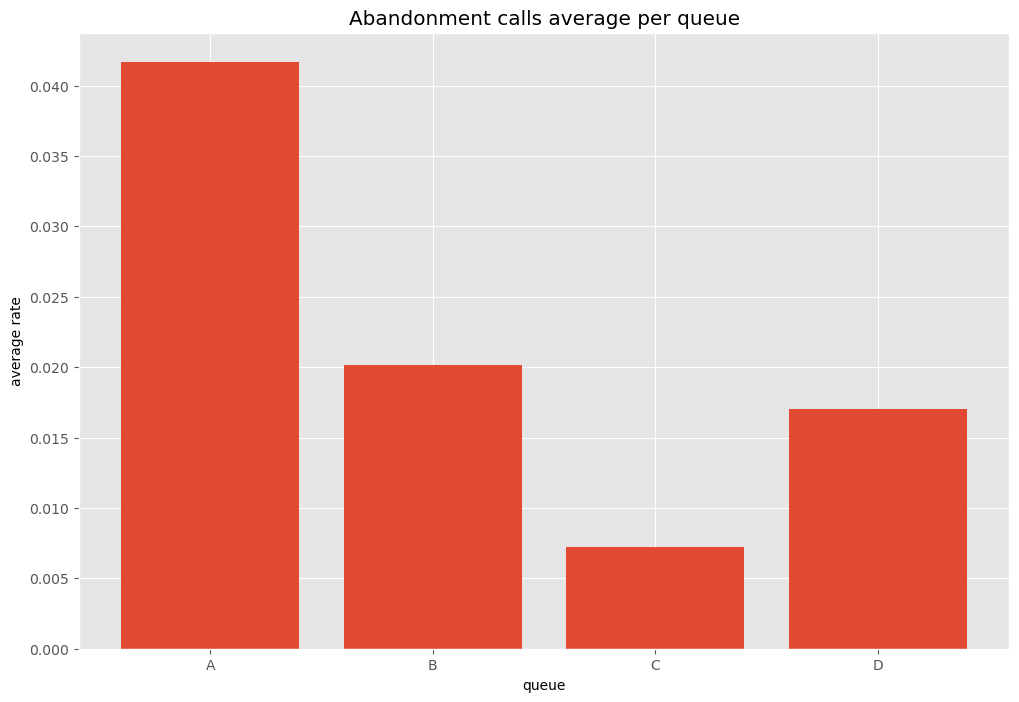

In [131]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
# df['Queue']
queue_dict = df.groupby("Queue").agg("sum")

print(queue_dict)
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

# x=abandonment_rates.keys()
# y=abandonment_rates.values()

plt.bar(x,y)
plt.title('Abandonment calls average per queue')
plt.xlabel('queue')
plt.ylabel('average rate')

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [92]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
# print(total_stats)
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100



#Your Code Here:


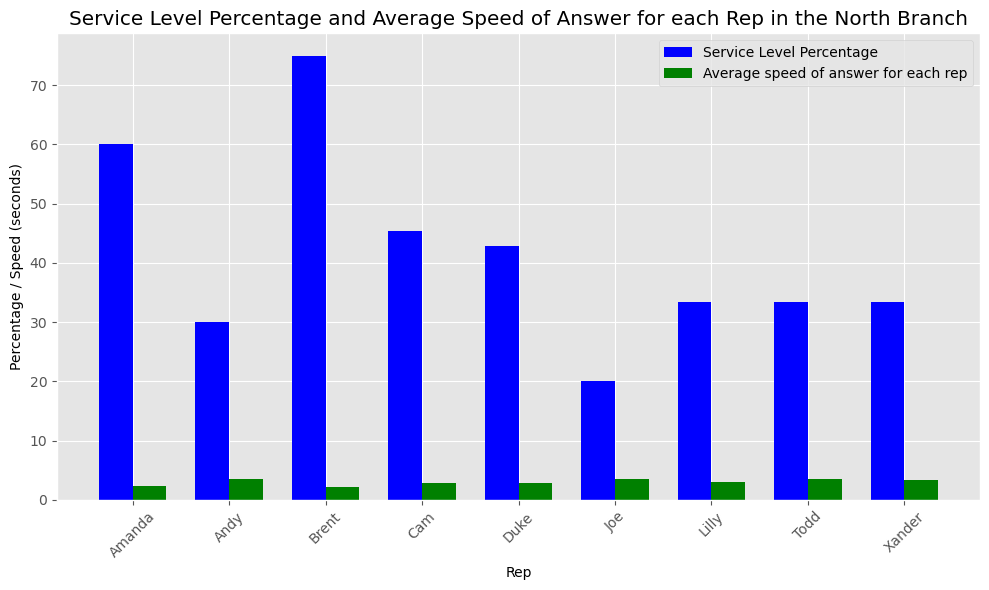

In [129]:
grouped_data=pd.merge(north_plt,service_level,on='Rep ID')

# grouped_data['Rep ID']



bar_positions = list(range(len(grouped_data)))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plotting Service Level Percentage
ax.bar(
    bar_positions,
    grouped_data['Service Level %'],
    bar_width,
    label='Service Level Percentage',
    color='b'
)

# Plotting Average Speed Of Answer
ax.bar(
    [pos + bar_width for pos in bar_positions],
    grouped_data['Incoming Wait Time'],
    bar_width,
    label='Average speed of answer for each rep',
    color='g'
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(grouped_data['Rep ID'])
ax.set_xlabel('Rep')
ax.set_ylabel('Percentage / Speed (seconds)')
ax.set_title('Service Level Percentage and Average Speed of Answer for each Rep in the North Branch')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [157]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need


purpose_group = df.groupby("Call Purpose")

call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints_d = purpose_counts["Complaint"].to_dict()
sales_support_d = purpose_counts["Sales Support"].to_dict()
product_support_d = purpose_counts["Product Support"].to_dict()



# Your Code Here:

# complaints.keys()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


1

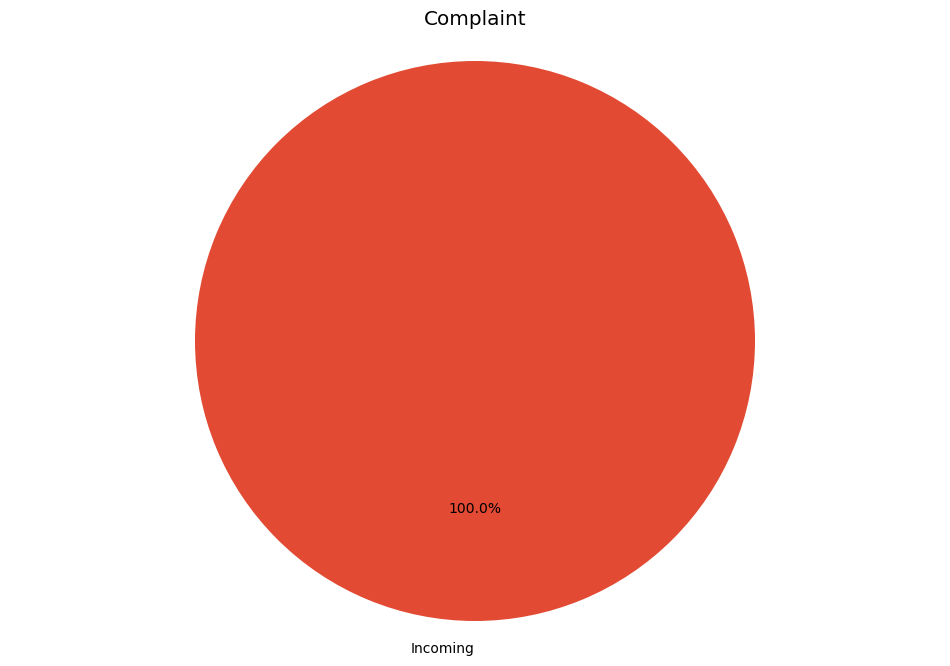

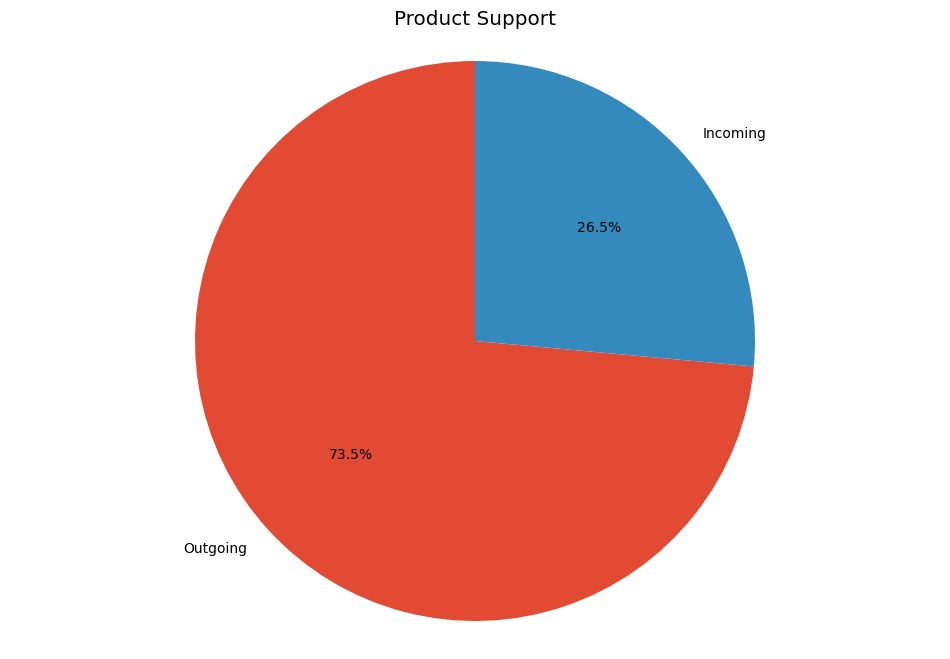

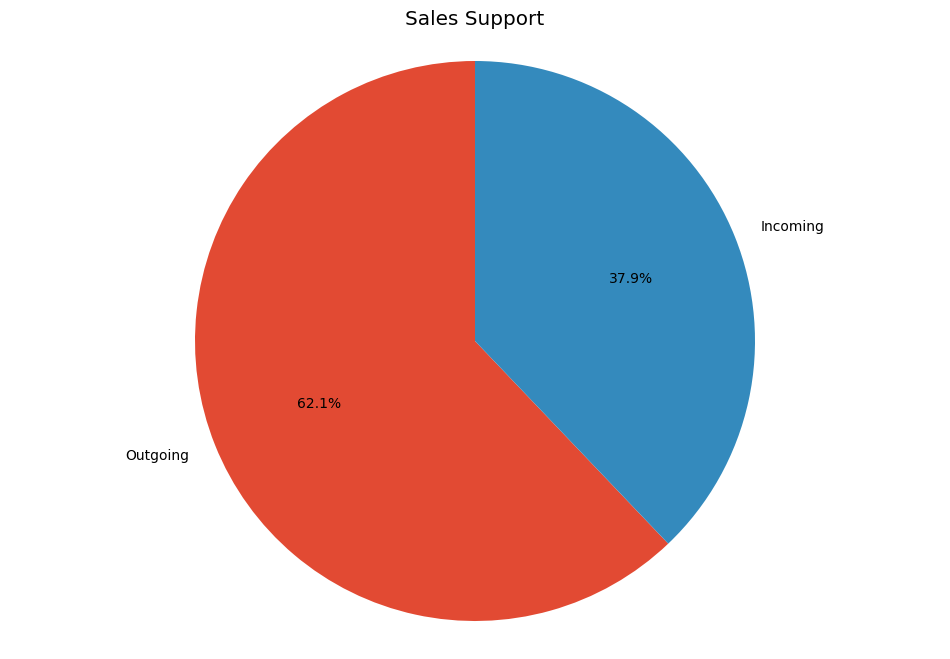

In [162]:
# Function to plot a pie chart for a single call purpose
def plot_pie_chart(di,call_purpose):
    # Get the data for the specific call purpose
    title=call_purpose
    
    # Create the pie chart
    plt.figure()
    plt.pie(di.values(), labels=di.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')

# Loop through each call purpose dictionary and plot a pie chart for each
call_purposes = ["Complaint", "Product Support", "Sales Support"]
for call_purpose in call_purposes:
    if call_purpose == 'Product Support':
        plot_pie_chart(product_support_d,call_purpose)
    elif call_purpose == 'Sales Support':
        plot_pie_chart(sales_support_d,call_purpose)
    elif call_purpose == 'Complaint':
        plot_pie_chart(complaints_d,call_purpose)

plt.show()




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: